Anotações para mentoria:
- Há forma mais eficiente de fazer plot sucessivos entre 2 features?
- Quando fazer função de features com baixa representatividade?

# Abertura dos arquivos

Configurações iniciais para iniciar exploração

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import gc
import matplotlib.pyplot as plt
%matplotlib inline

Leitura preliminar dos arquivos

In [2]:
acquisition = pd.read_csv('data/acquisition_train.csv')
acquisition.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [3]:
print ("Rows     : " ,acquisition.shape[0])
print ("Columns  : " ,acquisition.shape[1])
print ("\nFeatures : \n" ,acquisition.columns.tolist())
print ("\nMissing values :  ", acquisition.isnull().sum().values.sum())
print ("\nUnique values :  \n",acquisition.nunique())

Rows     :  45000
Columns  :  43

Features : 
 ['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']

Missing values :   219437

Unique values :  
 ids                                                 45000
target_

In [5]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
ids                                                 45000 non-null object
target_default                                      41741 non-null object
score_1                                             44438 non-null object
score_2                                             44438 non-null object
score_3                                             44438 non-null float64
score_4                                             45000 non-null float64
score_5                                             45000 non-null float64
score_6                                             45000 non-null float64
risk_rate                                           44438 non-null float64
last_amount_borrowed                                15044 non-null float64
last_borrowed_in_months                             15044 non-null float64
credit_limit                                        31200 non-null flo

In [101]:
spend = pd.read_csv('data/spend_train.csv')
spend.head(n = 20)

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89
5,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,5,1316.74,0.00,0,0.00
6,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,6,17651.45,8903.46,0,25.62
7,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,7,403.46,0.00,0,10.32
8,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,8,2475.79,0.00,0,7.64
9,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,9,87.45,1.40,0,0.00


# EDA 

Categóricas:

- real_state, n_bankruptcies possui 2 categorias praticamente inexistentes
- channel, n_defaulted_loans só possui 1 classe realmente relevante (1)
- external_data_provider_credit_checks_last_month, external_data_provider_credit_checks_last_year, ok_since revela nada
- vale uma binzarização maior na score_3

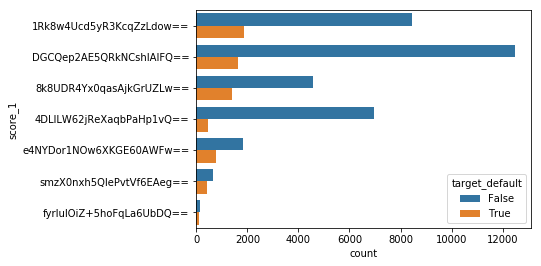

In [39]:
def catTargetPlot (cat):
    sns.countplot(y = cat, hue = 'target_default', data = acquisition)
catTargetPlot ('score_1')

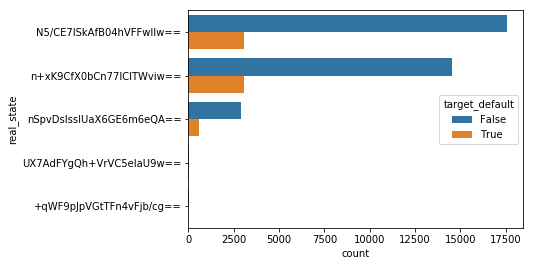

In [42]:
catTargetPlot('real_state')

Numéricas:

- score_3 é uma numérica já agrupada, mas vale agrupar mais - talvez valha tentar em todas com pouca variância na distribuição do target
- score_(4,5,6), risk_rate, n_defaulted_loans,credit_limit possuem pouco influência direta na variável
- Os scores de credito tem nenhuma tendência linear ou agrupamento em relação ao target
- reason, job_name é inusável a princípio

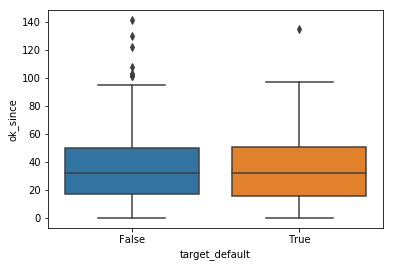

In [43]:
def numTargetPlot (num):
    sns.boxplot(y = num, x = 'target_default', data = acquisition)
numTargetPlot('ok_since')    

In [3]:
acquisition.reported_income.replace([np.inf, -np.inf], np.nan, inplace = True)

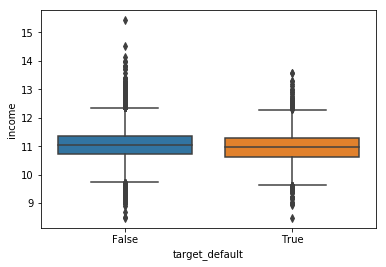

In [34]:
sns.boxplot(y = np.log(acquisition.reported_income), x = acquisition.target_default)
#acquisition.reported_income.replace([np.inf, -np.inf], np.nan)
#acquisition.reported_income.replace([np.inf, -np.inf], np.nan).describe()

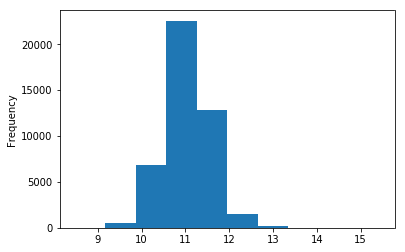

In [32]:
np.log(acquisition.reported_income).plot(kind = 'hist')

### 1.1

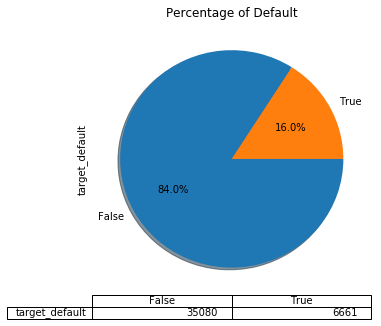

In [21]:
plt.figure(figsize=(5,5))

plt.title('Percentage of Default')
acquisition['target_default'].value_counts().plot(kind='pie', table=True, autopct='%1.1f%%',
counterclock=False, shadow=True)

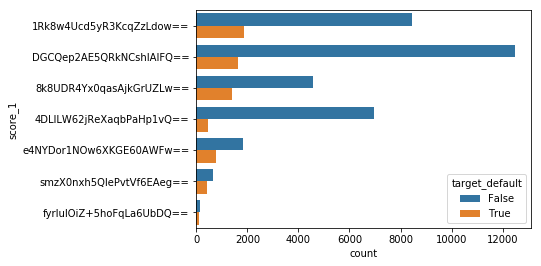

In [28]:
sns.countplot(y = 'score_1', hue = 'target_default', data = acquisition)

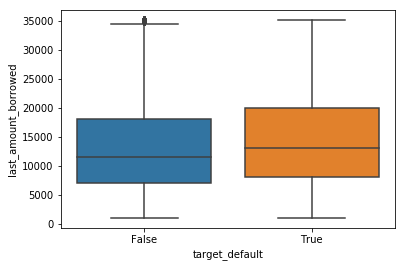

In [37]:
sns.boxplot(y = 'last_amount_borrowed', x = 'target_default', data = acquisition)

###  1.2

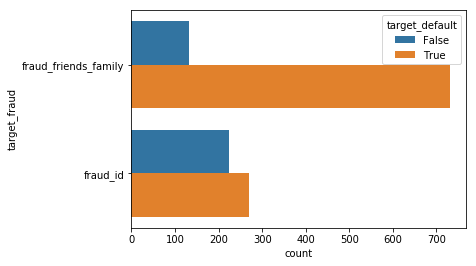

In [16]:
catTargetPlot ('target_fraud')

### 1.3

Text(0.5,1,'pv_3m')

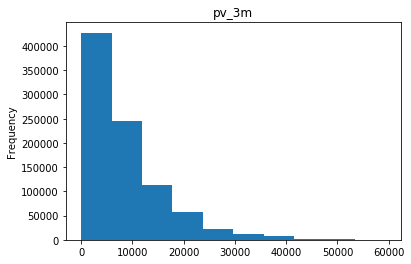

In [131]:
spend.groupby(['ids', 'credit_line']).spends.rolling(3).sum().plot(kind = 'hist')
plt.title('pv_3m')

# Data Cleaning

### Missing Values

In [62]:
# colunas com missing values
missingValueColumns = acquisition.columns[acquisition.isnull().any()].tolist()
acquisition_null = acquisition[missingValueColumns] 

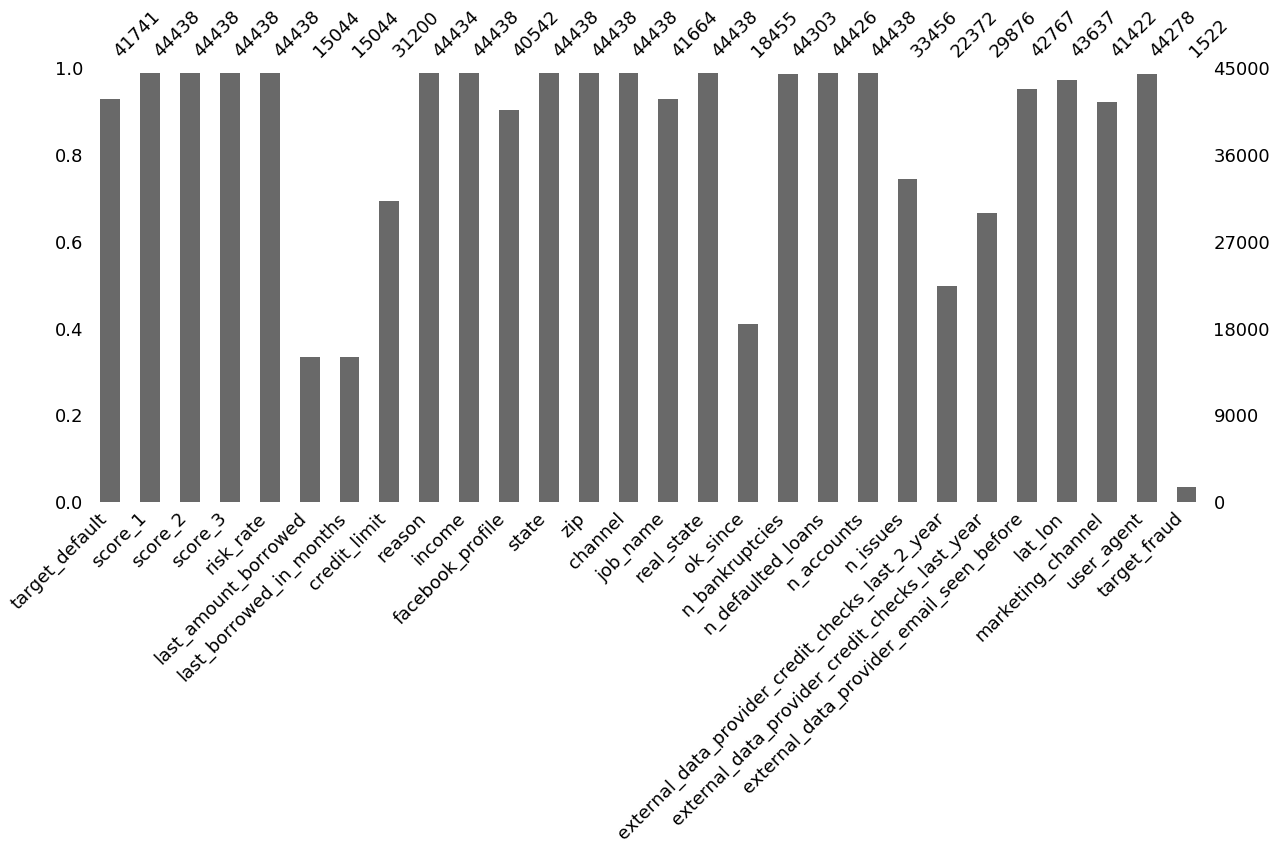

In [64]:
msno.bar(acquisition_null,figsize=(20,8),fontsize=18,labels=True)

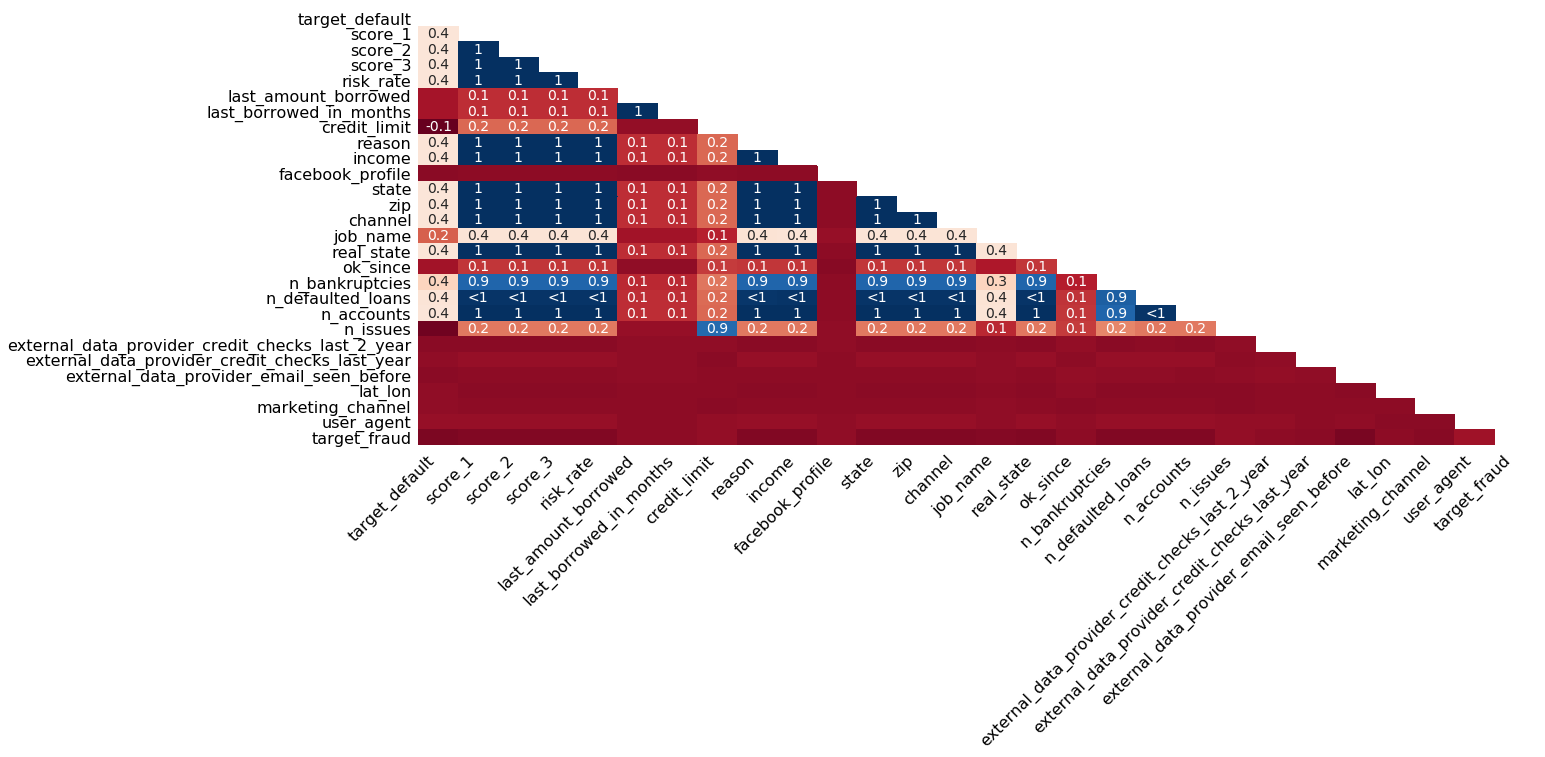

In [66]:
msno.heatmap(acquisition_null,figsize=(20,8))

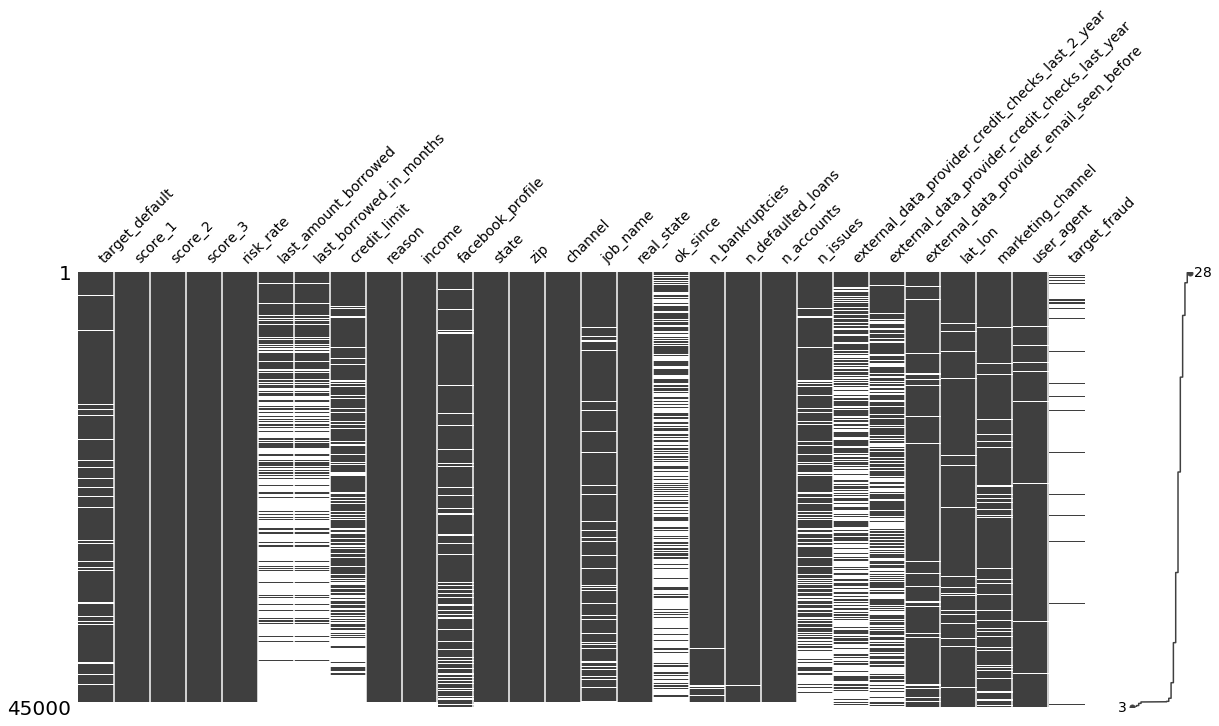

In [67]:
sorted_data = msno.nullity_sort(acquisition_null, sort='descending') # or sort='ascending'
msno.matrix(sorted_data,figsize=(20,8),fontsize=14)

### Definição do modelo inicial

In [ ]:
#from datetime import datetime
#datetime.strptime(acquisition.application_time_applied, '%H:%M:%S')
#acquisition.application_time_applied = acquisition.application_time_applied.map(lambda x: datetime.strptime(x, '%H:%M:%S'))
# valores como 00:60:02 inviabilizam o rolê

In [4]:
acquisition_bl = acquisition.copy()

In [5]:
acquisition_bl.dropna(subset = ['target_default'], inplace = True)
acquisition_bl.drop(['ids', 'zip', 'job_name', 'lat_lon', 'profile_phone_number', 'application_time_applied',
                     'shipping_zip_code', 'profile_tags', 'user_agent', 'reason', 'channel', 
                     'external_data_provider_first_name'], axis = 1, inplace = True)
acquisition_bl.reset_index(drop=True, inplace = True)

#falta checar melhorzinho antess de prosseguir

In [61]:
acquisition_bl.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,target_fraud
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,NaN,2,0.0,51.0,leidelaura,645,Invite-email,57849.0,BR-MT,NaN
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,...,0.0,1,0.0,17.0,diocezio,243,Radio-commercial,4902.0,BR-RS,NaN
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,NaN,2,NaN,9.0,veralucia,65,Waiting-list,163679.0,BR-RR,NaN
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,...,NaN,3,NaN,38.0,venice,815,Waiting-list,1086.0,BR-RN,NaN
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,...,0.0,2,1.0,46.0,darzisa,320,Invite-email,198618.0,BR-MT,NaN


In [94]:
acquisition_bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41741 entries, 0 to 41740
Data columns (total 32 columns):
target_default                                      41741 non-null object
score_1                                             41741 non-null object
score_2                                             41741 non-null object
score_3                                             41741 non-null float64
score_4                                             41741 non-null float64
score_5                                             41741 non-null float64
score_6                                             41741 non-null float64
risk_rate                                           41741 non-null float64
last_amount_borrowed                                14133 non-null float64
last_borrowed_in_months                             14133 non-null float64
credit_limit                                        28632 non-null float64
income                                              41741 non-null fl

In [95]:
acquisition_bl.nunique()

target_default                                          2
score_1                                                 7
score_2                                                35
score_3                                                87
score_4                                             41741
score_5                                             41741
score_6                                             41741
risk_rate                                              81
last_amount_borrowed                                13480
last_borrowed_in_months                                 2
credit_limit                                        19336
income                                              38849
facebook_profile                                        2
state                                                  50
real_state                                              5
ok_since                                              100
n_bankruptcies                                          6
n_defaulted_lo

In [6]:
def create_dummies(df,column_names, limit = 50):
    df = df.copy()
    for feature in column_names:
        if len(df[feature].unique())>2 and len(df[feature].unique()) <= limit:
            dummies = pd.get_dummies(df[feature],prefix=feature,dummy_na=True, drop_first = False) # não sei ao certo se caga colocar true
            df = pd.concat([df,dummies],axis=1)
            df.drop(feature, axis = 1, inplace = True)
    return df

In [7]:
acquisition_ohe = create_dummies(acquisition_bl, acquisition_bl.columns)
acquisition_ohe.dtypes

target_default                                       object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
credit_limit                                        float64
income                                              float64
ok_since                                            float64
application_time_in_funnel                            int64
external_data_provider_credit_checks_last_2_year    float64
external_data_provider_email_seen_before            float64
external_data_provider_fraud_score                    int64
reported_income                                     float64
score_1_1Rk8w4Ucd5yR3KcqZzLdow==                      uint8
score_1_4DLlLW62jReXaqbPaHp1vQ==        

# Baseline Models

One hot encoding das variáveis categóricas

In [8]:
acquisition_ohe.fillna(-1, inplace=True)

Separação em Dados de Teste e Treino

In [9]:
from sklearn import model_selection

# Separando o array em componentes de input e output
y = acquisition_ohe.iloc[:,0]
X = acquisition_ohe.iloc[:,1:]

# Definindo o tamanho das amostras
teste_size = 0.3

# Garante que os resultados podem ser reproduzidos
seed = 666

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, y_treino, y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

Função para otimizar teste de diversos modelos junto a CVs

In [12]:
# Import dos módulos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from xgboost import XGBClassifier

# Preparando os modelo
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
#modelos.append(('SVM', SVC()))
modelos.append(('XGB', XGBClassifier()))

# Função para comparação
def compara_cv_modelos (X, y, modelos, num_folds = 10, seed = 666):
    # Avaliando cada modelo
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        kfold = model_selection.StratifiedKFold(n_splits = num_folds, random_state = seed)# stratified é necessário para class imbalance
        cv_results = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'roc_auc')
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
        print(msg)

   # Boxplot para comparar os algoritmos
    fig = plt.figure()
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados)
    ax.set_xticklabels(nomes)
    plt.show()

LR: 0.499977 (0.013746)


C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rafae\Anacond

LDA: 0.741206 (0.007769)
NB: 0.546059 (0.010851)
KNN: 0.520540 (0.015356)
CART: 0.575255 (0.014678)
XGB: 0.748641 (0.008038)


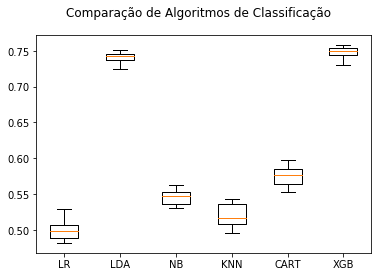

In [14]:
s
compara_cv_modelos (X_treino, y_treino, modelos)